In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > UniGe Cosmo Machine Learning </h1> 
<h2 style = "text-align:center"> Tutorial 1 - Intro to ML </h2> 
<h3 style = "text-align:center"> 31.01.2020 - Michele & Ben </h3> 
<hr style="border-width:2px;border-color:#75DFC1">


> This tutotial shows a complete typical ML exercise so to provide a basic, re-usable "template". Many aspects will be covered in depth in subsequent tutorials - so, don't panic (yet) if some steps look like a black box! 

> Summary:
* ML workflow
* Data pre - processing (quick - see python tutorial w. David for extensive coverage!)
* Logistic regression
* Evaluation and model selection

> Goals:
* Prepare your data
* Set up quick ML soution to the problem as base model, then diagnose its performance and limitations
* Understand how to ameliorate the model
* At the end: "working" logistic regression model

> Packages and resources:
* This tutorial is strongly based on **pandas** and **scikit-learn** (maybe **seaborn** for data viz). For pandas, come to our second python tutorial :). [**scikit-learn**](https://scikit-learn.org/stable/) is an open source, user-friendly machine learning library. We will introduce it step-by-step, but it has an extensive documentation as well as tutorials. Check that out ;)
* The [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) hosts many popular simple datasets to play around with
* [Kaggle](https://www.kaggle.com) is the most popular data science platform. It hosts competitions, datasets, tutorials, ... Also cosmo-related, e.g. [Supernovae classification competition](https://www.kaggle.com/c/PLAsTiCC-2018)

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Template for ML project </h2> 
<hr style="border-width:2px;border-color:#75DFC1">


> A) **DATA** AND PROBLEM DEFINITION 
- (Acquire data)
- Understand data and problem (type of variables, regression/classification, ...)
- Wrangle, prepare, cleanse the data
- Analyze, identify patterns, and explore the data.
- Split train/validation/test set. FORGET TEST SET UNTIL PART C) !

> B) TRAIN A CLASSIFIER
- Try quick simple solution
- Improve your solution w. simple disgnostics (bias/variance tradeoff, add features, try different models, addd regularisation, ...) on the validation set     

> C) EVALUATE
- Choose metric to evaluate performace depending on the problem
- Evaluate model on test set
- Go back to B) if needed

> D) Optional: once best model is chosen, re-train on the full dataset to gain some more statistics



<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Case study: the Titanic challenge </h2> 
<hr style="border-width:2px;border-color:#75DFC1">


> The first mandatory problem for all data scientists. Check out the [Kaggle competition page](https://www.kaggle.com/c/titanic/overview). 

> From the description of the competition: 

    "The sinking of the Titanic is one of the most infamous shipwrecks in history.

    On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

    While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

    In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)."
    
> Data : Kaggle provides two dataset, a training set where the outcome is known (i.e. survived or not), and a test set where the outcome is unknown. Once a model is submitted to Kaggle, the test set will be used by evaluation.

> Reference for this tutorial: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Data </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Get data
- Manual: go to the [competition page](https://www.kaggle.com/c/titanic/data), scroll down and get the files train.csv and test.csv
- Or: run the following cells. Kaggle has an API that allows to fetch data directly. This will download and unzip the data files in your current directory. 

In [ ]:
# ! pip install kaggle

In [ ]:
# ! kaggle competitions download -c titanic

In [ ]:
# ! unzip titanic.zip 

## Explore the data

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Reminder : This section hevily uses the python library <code style = "background-color:transparent; color:inherit">pandas</code>. If you're not familiar with it, we will have a dedicated tutorial at the end of which you will be able to reproduce all the steps yourself.
</div>

In [1]:
# This imports the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# just to make larger plots later
a4_dims = (11.7, 8.27)

### Load and have a look at your data

Always start with simple questions and trivial yet necessary steps. E.g.:
- What do my columns (features) represent?
- What is the type of every variable (feature)? 
- Are there missing values?
    

In [2]:
# Import data in a pandas dataframe
data_train=pd.read_csv('train.csv' )
data_test = pd.read_csv('test.csv')
my_data=[data_train, data_test] # this is to process test and training feature together later


In [3]:
# Have a glance at the data
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.shape

(891, 12)

In [5]:
data_test.shape

(418, 11)

**QUESTIONS**
* How many features do we have? 
* Which features are categorical? Which are numerical? 

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass.
- Continous: Age, Fare
- Discrete: SibSp, Parch.

* Distribution of numerical features

In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Distribution of categorical features

In [8]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Albimona, Mr. Nassef Cassem",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


Check: how many passengers actually survived (have to do better than this... )

In [9]:
len(data_train[data_train['Survived']==0])/float(len(data_train))

0.6161616161616161

### Look for missing data

In [10]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Deal with missing points

Age could be a good indicator but has a lot of missing points

<Figure size 842.4x595.44 with 0 Axes>

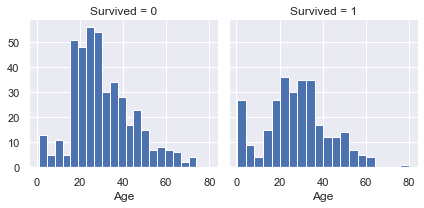

In [12]:
plt.figure(figsize=a4_dims);
g = sns.FacetGrid(data_train, col='Survived');
g.map(plt.hist, 'Age', bins=20);

What about missing features? We could try to "complete" them, e.g.:



- Generate random numbers between mean and std (noisy)

- Use other correlated features

- Use mean or median



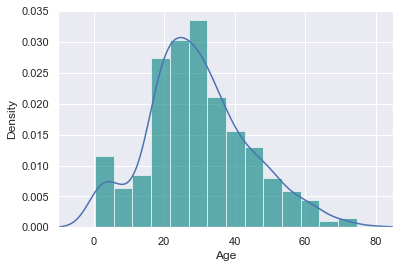

In [13]:
ax = data_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data_train["Age"].plot(kind='density');
ax.set(xlabel='Age');
plt.xlim(-10,85);
plt.show();

In [14]:
# mean age
print('Mean age %.2f' %(data_train["Age"].mean(skipna=True)))
# median age
print('Median age %.2f' %(data_train["Age"].median(skipna=True)))

Mean age 29.70
Median age 28.00


In [15]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data_train['Cabin'].isnull().sum()/data_train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


This feature is not useful.

In [16]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((data_train['Embarked'].isnull().sum()/data_train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


We can just ignore this or replace w. most frequent value

In [17]:
my_data_filled = []
for df in my_data:
    df_copy = df.copy()
    df_copy["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
    df_copy["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
    df_copy.drop('Cabin', axis=1, inplace=True)
    my_data_filled.append(df_copy)


In [18]:
my_data_filled[0].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

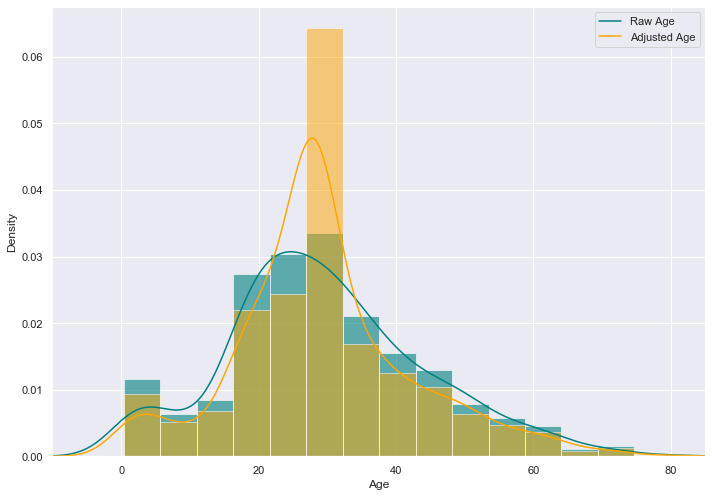

In [19]:
plt.figure(figsize=a4_dims);
ax = data_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6);
data_train["Age"].plot(kind='density', color='teal');
ax = my_data_filled[0]["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5);
my_data_filled[0]["Age"].plot(kind='density', color='orange');
ax.legend(['Raw Age', 'Adjusted Age']);
ax.set(xlabel='Age');
plt.xlim(-10,85);
plt.show();

### Look for correlations - categorical features

Let's start from features that don't have missing values, are categorical and could have a correlation with survival based on our understanding of the problem: gender and class.

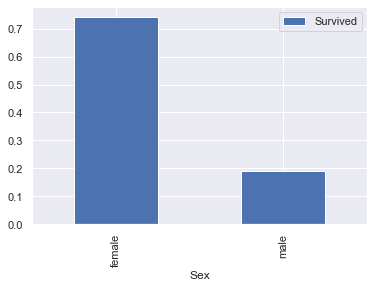

In [20]:
pivot = my_data_filled[0].pivot_table(index="Sex",values='Survived')
pivot.plot.bar()
plt.show()

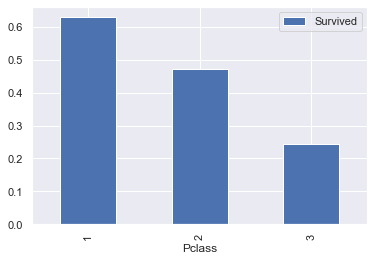

In [21]:
pivot = my_data_filled[0].pivot_table(index="Pclass",values='Survived')
pivot.plot.bar()
plt.show()

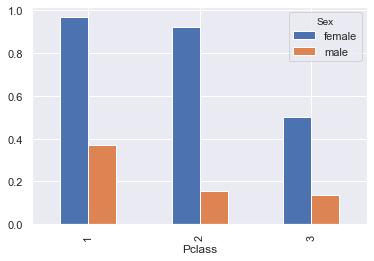

In [22]:
pivot = my_data_filled[0].pivot_table(index="Pclass",values='Survived', columns='Sex')
pivot.plot.bar()
plt.show()

We found two features that appear correlated with the survival - gender and class (surprise, surprise...)

### Continuous features

Bin continuous features. The function process_col_cutP creates the bins according to the cutpoints given as input in the vector cut_points.

In [23]:
# Process Column 

def process_col_cutP(df, colname, cut_points, label_names, process_null=False):
    if process_null:
        if process_null:
            df[colname] = df[colname].fillna(-0.5)
        else:
            df[colname].fillna(df[colname].dropna().median(), inplace=True)
    newcol=colname+'_categories'
    df[newcol] = pd.cut(df[colname],cut_points,labels=label_names)
    return df

#### Age

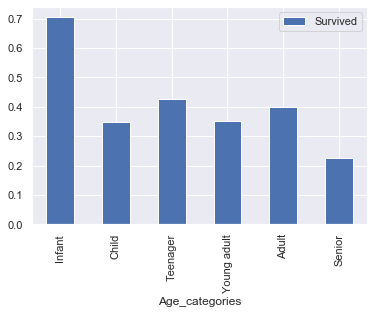

In [24]:
# Process age

cut_points = [0,5,10,18,35,60,200]
label_names = ["Infant","Child","Teenager","Young adult","Adult","Senior"]

for df in my_data_filled:
    df = process_col_cutP(df,'Age',cut_points,label_names,process_null=True)
    #print(df['Age_categories'].value_counts())
    #print(df['Age'].isnull().sum())

pivot = my_data_filled[0].pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

#### Fare

Medium    301
High      295
Low       295
Name: Fare_categories, dtype: int64

Medium    148
Low       139
High      131
Name: Fare_categories, dtype: int64

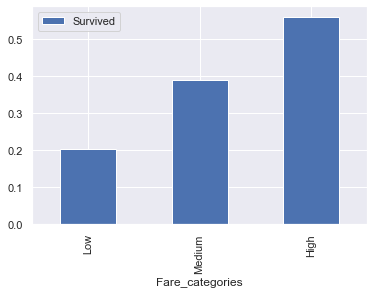

In [25]:
cut_points=[-1,8.66,26,10000]
label_names=["Low","Medium","High"]

for df in my_data_filled:
    df = process_col_cutP(df,'Fare',cut_points,label_names,process_null=True)
    df['Fare_categories'].value_counts()

pivot = my_data_filled[0].pivot_table(index="Fare_categories",values='Survived')
pivot.plot.bar()
plt.show()



#### Parents and children

No parch         678
One to two       198
More than Two     15
Name: Parch_categories, dtype: int64

No parch         324
One to two        85
More than Two      9
Name: Parch_categories, dtype: int64

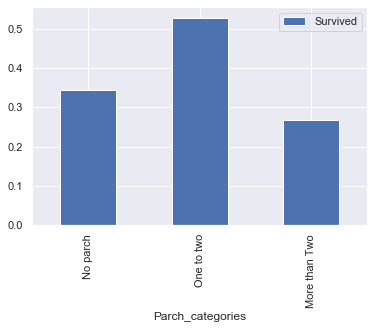

In [26]:
cut_points = [-1,0,2,100]
label_names = ["No parch","One to two","More than Two"]

for df in my_data_filled:
    df = process_col_cutP(df,'Parch',cut_points,label_names)
    df['Parch_categories'].value_counts()

pivot = my_data_filled[0].pivot_table(index="Parch_categories",values='Survived')
pivot.plot.bar()



#### Spouses

No sibSp         608
One to two       237
More than Two     46
Name: SibSp_categories, dtype: int64

No sibSp         283
One to two       124
More than Two     11
Name: SibSp_categories, dtype: int64

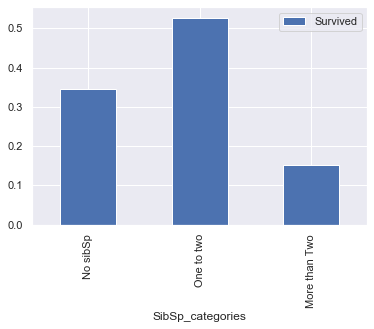

In [27]:
cut_points = [-1,0,2,100]
label_names = ["No sibSp","One to two","More than Two"]

for df in my_data_filled:
    df = process_col_cutP(df,'SibSp',cut_points,label_names)
    df['SibSp_categories'].value_counts()

pivot = my_data_filled[0].pivot_table(index="SibSp_categories",values='Survived')
pivot.plot.bar()

#### Derived features

Finally, we can envisage new features derived from the ones we have already. 

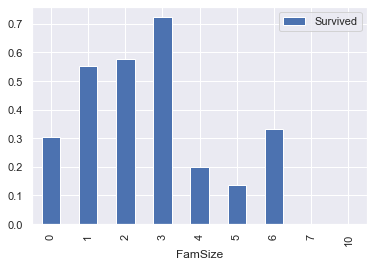

In [28]:
for df in my_data_filled:
    df['FamSize']=df['Parch']+df['SibSp']
    df['IsAlone'] = 0
    df.loc[df['FamSize'] == 1, 'IsAlone'] = 1

pivot = my_data_filled[0].pivot_table(index="FamSize",values='Survived')
pivot.plot.bar()



Alone             537
One to two        263
More than four     47
Two to Four        44
Name: FamSize_categories, dtype: int64

Alone             253
One to two        131
Two to Four        21
More than four     13
Name: FamSize_categories, dtype: int64

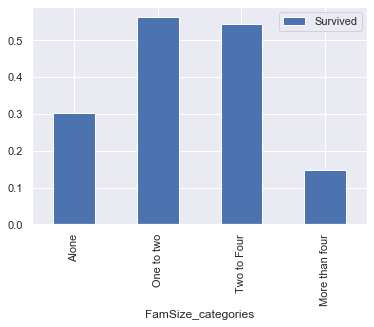

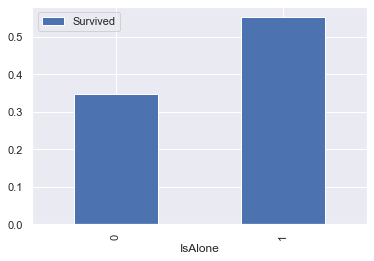

In [29]:
cut_points = [-1,0,2,4,100]
label_names = ["Alone","One to two","Two to Four", "More than four"]

for df in my_data_filled:
    df = process_col_cutP(df,'FamSize',cut_points,label_names)
    df['FamSize_categories'].value_counts()

pivot = my_data_filled[0].pivot_table(index="FamSize_categories",values='Survived')
pivot.plot.bar()

pivot = my_data_filled[0].pivot_table(index="IsAlone",values='Survived')
pivot.plot.bar()



The title can be correlated with the probability to survive (e.g. young man are likely to be dead...) . Extract title and show a histogram with % of survivals in each category.

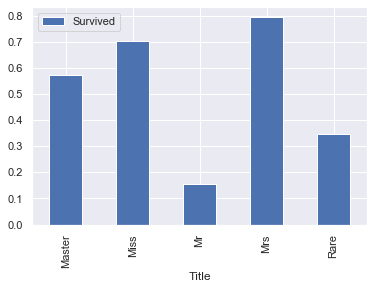

In [30]:
def addTitle(dataset):
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) # extract title
    
    # group all rare title in one feature
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') 

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    return dataset
 
for df in my_data_filled:
    df=addTitle(df)

pivot = my_data_filled[0].pivot_table(index="Title",values='Survived')
pivot.plot.bar()



### Summary and feature selection

Drop columns that have been replaced replaced

In [31]:
notUsed=['Name','Age','SibSp','Parch','Ticket','Fare',"FamSize"]

my_data_filled[0] = my_data_filled[0].drop(notUsed, axis=1)
my_data_filled[1] = my_data_filled[1].drop(notUsed, axis=1)


In [32]:
my_data_filled[0].head()

,PassengerId,Survived,Pclass,Sex,Embarked,Age_categories,Fare_categories,Parch_categories,SibSp_categories,IsAlone,FamSize_categories,Title
0,1,0,3,male,S,Young adult,Low,No parch,One to two,1,One to two,Mr
1,2,1,1,female,C,Adult,High,No parch,One to two,1,One to two,Mrs
2,3,1,3,female,S,Young adult,Low,No parch,No sibSp,0,Alone,Miss
3,4,1,1,female,S,Young adult,High,No parch,One to two,1,One to two,Mrs
4,5,0,3,male,S,Young adult,Low,No parch,No sibSp,0,Alone,Mr


In [33]:
my_data_filled[0].isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Sex                   0
Embarked              0
Age_categories        0
Fare_categories       0
Parch_categories      0
SibSp_categories      0
IsAlone               0
FamSize_categories    0
Title                 0
dtype: int64

In [34]:
my_data_filled[1].isnull().sum()

PassengerId           0
Pclass                0
Sex                   0
Embarked              0
Age_categories        0
Fare_categories       0
Parch_categories      0
SibSp_categories      0
IsAlone               0
FamSize_categories    0
Title                 0
dtype: int64

### One-hot encoding

In [35]:
# Create dummies

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df


In [36]:

cols_oneHot = ["Pclass","Sex","Age_categories","Fare_categories","Embarked","Title","FamSize_categories",'SibSp_categories','Parch_categories']

data_train_oheHot_c = my_data_filled[0].copy()
data_test_oheHot_c = my_data_filled[1].copy()
for column in cols_oneHot:
    print(column)
    data_train_oheHot_c = create_dummies(data_train_oheHot_c,column)
    data_test_oheHot_c = create_dummies(data_test_oheHot_c,column)

my_data_oneHot=[data_train_oheHot_c, data_test_oheHot_c]

Pclass
Sex
Age_categories
Fare_categories
Embarked
Title
FamSize_categories
SibSp_categories
Parch_categories


In [37]:
my_data_oneHot[0].head()

,PassengerId,Survived,Pclass,Sex,Embarked,Age_categories,Fare_categories,Parch_categories,SibSp_categories,IsAlone,...,FamSize_categories_Alone,FamSize_categories_One to two,FamSize_categories_Two to Four,FamSize_categories_More than four,SibSp_categories_No sibSp,SibSp_categories_One to two,SibSp_categories_More than Two,Parch_categories_No parch,Parch_categories_One to two,Parch_categories_More than Two
0,1,0,3,male,S,Young adult,Low,No parch,One to two,1,...,0,1,0,0,0,1,0,1,0,0
1,2,1,1,female,C,Adult,High,No parch,One to two,1,...,0,1,0,0,0,1,0,1,0,0
2,3,1,3,female,S,Young adult,Low,No parch,No sibSp,0,...,1,0,0,0,1,0,0,1,0,0
3,4,1,1,female,S,Young adult,High,No parch,One to two,1,...,0,1,0,0,0,1,0,1,0,0
4,5,0,3,male,S,Young adult,Low,No parch,No sibSp,0,...,1,0,0,0,1,0,0,1,0,0


In [38]:
my_data_oneHot[0] = my_data_oneHot[0].drop(cols_oneHot, axis=1)
my_data_oneHot[1] = my_data_oneHot[1].drop(cols_oneHot, axis=1)

In [39]:
my_data_oneHot[0].head()

,PassengerId,Survived,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Infant,Age_categories_Child,...,FamSize_categories_Alone,FamSize_categories_One to two,FamSize_categories_Two to Four,FamSize_categories_More than four,SibSp_categories_No sibSp,SibSp_categories_One to two,SibSp_categories_More than Two,Parch_categories_No parch,Parch_categories_One to two,Parch_categories_More than Two
0,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2,1,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4,1,1,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,5,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [40]:
my_data_oneHot[0].columns.to_list()

['PassengerId',
 'Survived',
 'IsAlone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_categories_Infant',
 'Age_categories_Child',
 'Age_categories_Teenager',
 'Age_categories_Young adult',
 'Age_categories_Adult',
 'Age_categories_Senior',
 'Fare_categories_Low',
 'Fare_categories_Medium',
 'Fare_categories_High',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'FamSize_categories_Alone',
 'FamSize_categories_One to two',
 'FamSize_categories_Two to Four',
 'FamSize_categories_More than four',
 'SibSp_categories_No sibSp',
 'SibSp_categories_One to two',
 'SibSp_categories_More than Two',
 'Parch_categories_No parch',
 'Parch_categories_One to two',
 'Parch_categories_More than Two']

In [64]:

X = my_data_oneHot[0][my_data_oneHot[0].columns.to_list()[2:]]
y = my_data_oneHot[0]['Survived']


In [65]:
X.head()

,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young adult,...,FamSize_categories_Alone,FamSize_categories_One to two,FamSize_categories_Two to Four,FamSize_categories_More than four,SibSp_categories_No sibSp,SibSp_categories_One to two,SibSp_categories_More than Two,Parch_categories_No parch,Parch_categories_One to two,Parch_categories_More than Two
0,1,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


### Normalize data (if needed)

Simple BUT essential ! A lot of ML models don't work if units of measure are not the same 
(Some do, e.g. random forests but most do not , e.g. Neural Networks, kNN, SVM, ....)

Also check RobustScaler: scales data but does not use outliers in computing statistics (you can choose which quantiles to consider when fitting )

In [66]:
# from sklearn.preprocessing import MinMaxScaler

# X = MinMaxScaler().fit_transform(X)

### Split into train and test set

In [67]:
from sklearn.model_selection import train_test_split 

In [107]:
# More advanced: use k-fold or multiple train-test split !

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Note: use stratify to keep proportion of output classes when splitting ! 
# Super important if you have unmbalanced classes
# When doing k-fold cross validation, check Stratified k-fold



<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Classifier </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### General usage of sklearn:
    
    1 - Instantiate object
    2 - use .fit method with appropriate input to train model
    3 - use .predict to get predictions, .predict_proba to get probabilities (if any), .score for accuracy on test set. For other metrics, check sklearn.metrics
        


### Dummy classifiers

Starting note on classifiers. When evaluating performance,  "accuracy" by itself and alone doesn't mean much. To say if it is enough, should always compare to something else: start by setting a lower bound on you accuracy and then improve.

To this extent, scikit-learn has dummy estimators. E.g. a dummy classifier can predict always the most frequent class in your dataset. Or, a stratified dummy classifier giver random outputs based on the frequency of the training set



In [108]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

0.664804469273743

### Less dummy classifiers

In [109]:
from sklearn.metrics import  accuracy_score
#df.apply(lambda x: x['Sex_female'], axis=1)

accuracy_score(y_test, X_test['Sex_female'])

0.776536312849162

In [110]:
y_pred = X_test.apply(lambda x: x['Sex_female'] or x['Age_categories_Infant'] , axis=1)
accuracy_score(y_test, y_pred)

0.7932960893854749

### Linear models

* Module: sklearn.linear_model

* Simplest : logistic regression


#### Dummy logReg

In [72]:
from sklearn.linear_model import LogisticRegression

c = ['Sex_female', 'Age_categories_Infant']

logreg_dummy = LogisticRegression()
logreg_dummy.fit(X_train[c], y_train)

logreg_dummy.score(X_test[c], y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.7821229050279329

In [73]:

c = ['Sex_female', 'Age_categories_Infant']

logreg_dummy = LogisticRegression(class_weight='balanced')
logreg_dummy.fit(X_train[c], y_train)
y_pred_dummy=logreg_dummy.predict(X_test[c])

logreg_dummy.score(X_test[c], y_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.7821229050279329

#### Full logReg

In [74]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

y_pred_full=logreg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.8379888268156425

In [75]:
coeff_df = pd.DataFrame(my_data_oneHot[0].columns.to_list()[1:])

coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
18,Embarked_S,1.723125
6,Sex_male,1.142949
4,Pclass_3,0.894286
1,IsAlone,0.824269
21,Title_Mr,0.605922
24,FamSize_categories_Alone,0.567443
27,FamSize_categories_More than four,0.416803
28,SibSp_categories_No sibSp,0.377226
14,Fare_categories_Medium,0.351460
30,SibSp_categories_More than Two,0.292647


In [76]:
sorted_features = coeff_df.sort_values(by='Correlation', ascending=False)['Feature'].to_list()

### Optimal number of features

In [77]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))


RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features: 12
Selected features: ['Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_categories_Infant', 'Age_categories_Senior', 'Title_Master', 'Title_Mr', 'Title_Rare', 'FamSize_categories_Alone', 'FamSize_categories_More than four', 'SibSp_categories_More than Two']


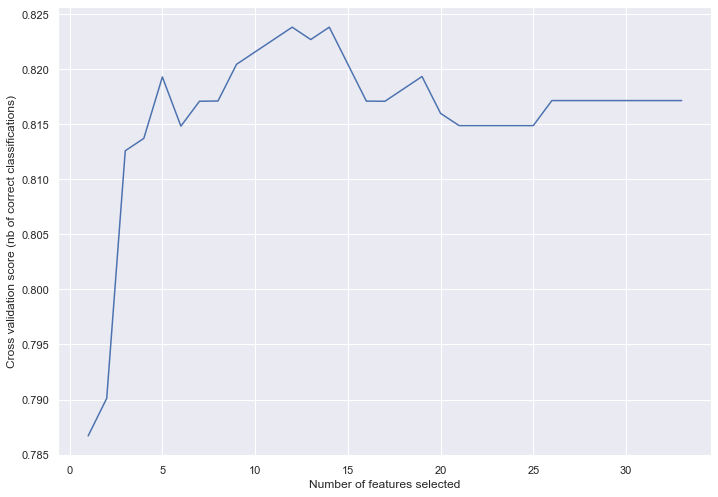

In [78]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=a4_dims)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show();

In [79]:
opt_columns = X.columns[rfecv.support_].to_list()

y_pred_opt = rfecv.predict(X_test)

accuracy_score(y_test, y_pred_opt)

0.8491620111731844

In [111]:
opt_columns

['Pclass_1',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Age_categories_Infant',
 'Age_categories_Senior',
 'Title_Master',
 'Title_Mr',
 'Title_Rare',
 'FamSize_categories_Alone',
 'FamSize_categories_More than four',
 'SibSp_categories_More than Two']

In [80]:
logreg_opt = LogisticRegression()
logreg_opt.fit(X_train[opt_columns], y_train)
logreg_opt.score(X_test[opt_columns], y_test)

y_pred_opt=logreg_opt.predict(X_test[opt_columns])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.8491620111731844

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Evaluation - 1</h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Learning curves etc.

In [81]:
def plot_LC(X, y, model, metric):
    
    test_err=[]
    train_err=[]
    
    tsList = np.arange(0.1,0.9,0.05)
    n_train_points=[]
    for ts in tsList:
        feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=ts, random_state=42)
        #myReg = linear_model.LinearRegression()
        model.fit(feature_train,target_train)
        
        n_train_points.append( feature_train.shape[0])
        test_err.append(metric(target_test, model.predict(feature_test)))
        train_err.append(metric(target_train, model.predict(feature_train)))
    
    plt.figure(figsize=a4_dims)
    plt.plot(n_train_points,test_err, label = 'Test')
    plt.plot(n_train_points,train_err, label = 'Train')
    plt.xlabel("Number of training points", fontsize=18);
    plt.ylabel("Accuracy", fontsize=18);
    plt.legend(fontsize=16);

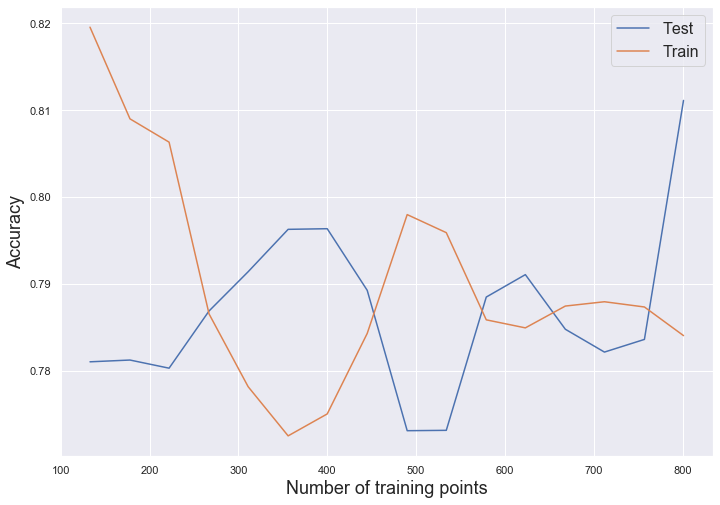

In [82]:
plot_LC(X[c], y, LogisticRegression(), accuracy_score)

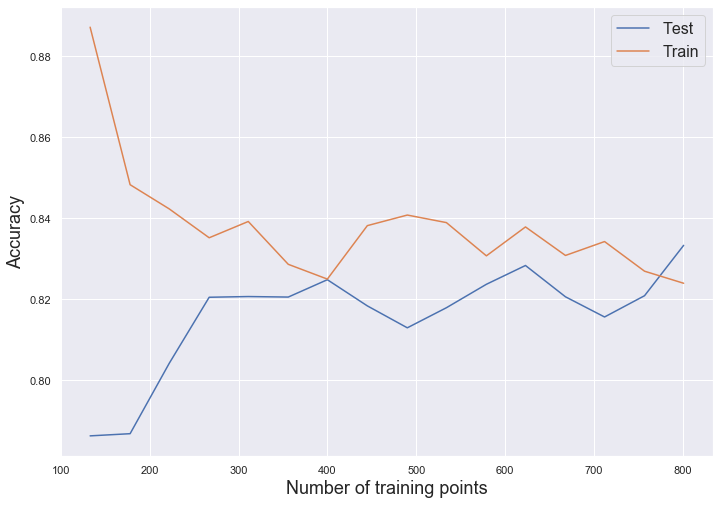

In [83]:
plot_LC(X, y, LogisticRegression(), accuracy_score)

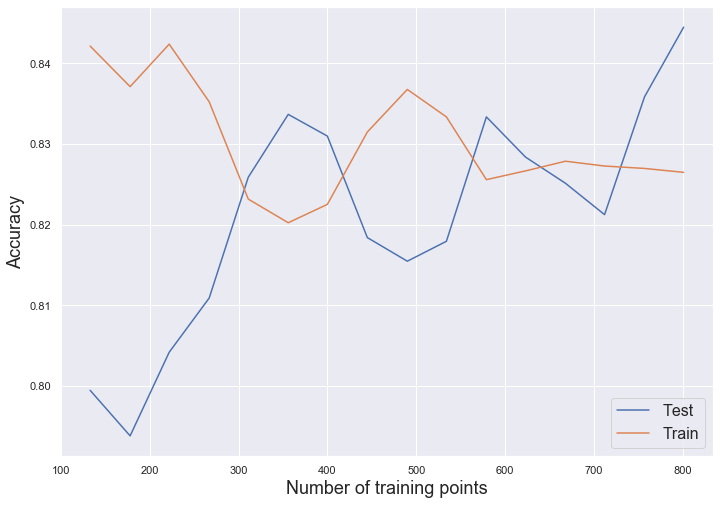

In [84]:
plot_LC(X[opt_columns], y, LogisticRegression(), accuracy_score)

### Model complexity

In [85]:
def plot_MC(X, y, model, metric, flist):
    
    test_err=[]
    train_err=[]
    nf=[]
    
    for i in range(1, len(flist)+1):
        feature_train, feature_test, target_train, target_test = train_test_split(X.iloc[:,:i], y, test_size=0.15, random_state=42)
        #myReg = linear_model.LinearRegression()
        model.fit(feature_train,target_train)      
        nf.append(i)
        test_err.append(1-metric(target_test, model.predict(feature_test)))
        train_err.append(1-metric(target_train, model.predict(feature_train)))
    plt.figure(figsize=a4_dims)
    plt.plot(nf,test_err, label = 'Test')
    plt.plot(nf,train_err, label = 'Train')
    plt.xlabel("Number of features", fontsize=18);
    plt.ylabel("Error", fontsize=18);
    plt.legend(fontsize=16);

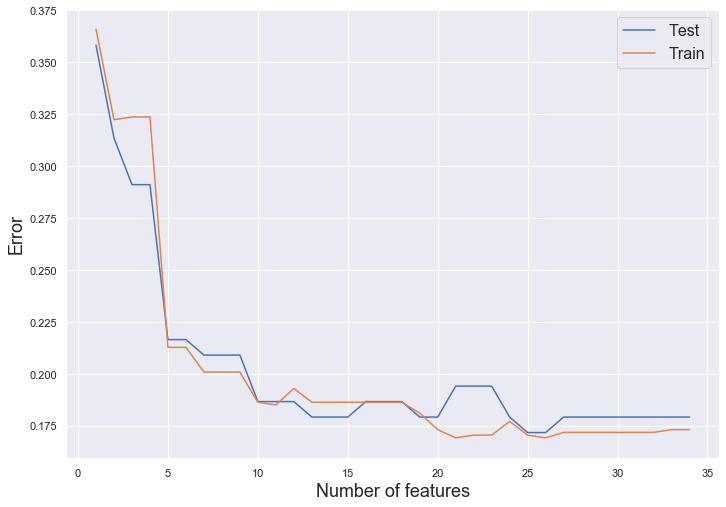

In [86]:
plot_MC(X, y, LogisticRegression(), accuracy_score, sorted_features)

### Evaluation metrics

In [87]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


def print_cm(cm, names):

    
    matrix_proportions = np.zeros((len(names),len(names)))
    for i in range(0,len(names)):
        matrix_proportions[i,:] = cm[i,:]/float(cm[i,:].sum())
    print(matrix_proportions)    
    
    confusion_df = pd.DataFrame(matrix_proportions, 
                            index=names,columns=names)
    plt.figure(figsize=(10,10))
    sns.heatmap(confusion_df, annot=True,
            annot_kws={"size": 12}, cmap='gist_gray_r',
            cbar=False, square=True, fmt='.2f');
    plt.ylabel(r'True categories',fontsize=14);
    plt.xlabel(r'Predicted categories',fontsize=14);
    plt.tick_params(labelsize=12);
    plt.show()
    



#### Confusion matrix

[[0.88135593 0.11864407]
 [0.24590164 0.75409836]]


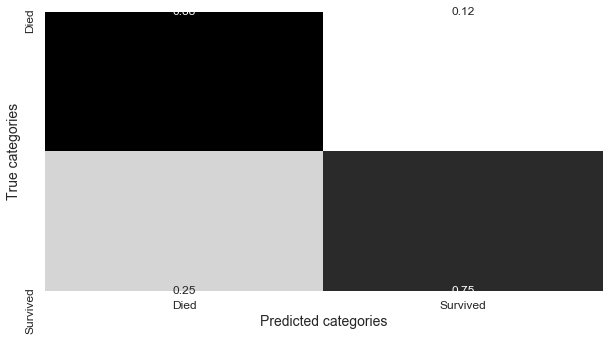

In [88]:
cm = confusion_matrix(y_test, y_pred_full)
print_cm(cm, names=['Died', 'Survived'])

[[0.8220339  0.1779661 ]
 [0.29508197 0.70491803]]


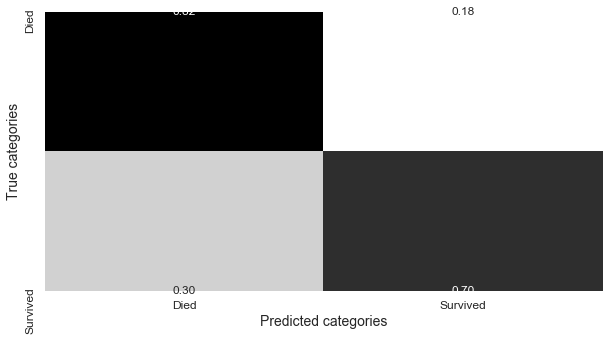

In [89]:
cm = confusion_matrix(y_test, y_pred_dummy)
print_cm(cm, names=['Died', 'Survived'])

#### Other metrics

In [90]:
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       118
           1       0.67      0.70      0.69        61

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [91]:
print(classification_report(y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       118
           1       0.77      0.75      0.76        61

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [92]:
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       118
           1       0.81      0.72      0.77        61

    accuracy                           0.85       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



#### ROC curve

> By default, the `predict()` method of a classifier in the case of logistic regression rates a sample as positive if the probability to be in the positive class is superior to the 0.5 threshold. 

> It can be useful to change this classification threshold. The `predict_proba()` method returns for a given set of samples, the probability that they are in the positive class. This way, one can classify samples using any threshold. 

> A very useful tool to evaluate models is the **Receiver Operating Characteristics** curve : it sums up the performance of a binary classifier depending on the classification threshold. Graphically, the ROC curve represents the true positive rate, and the false negative rate. That is to say the sensibility and the anti-sensitivity ($= 1 - sensitivity$).

> Each value at a classification threshold gives a point of the ROC curve, that goes from (0,0) to (1,1). The closer the curve is to (0,1) the better the model is. Indeed, having both sensitivity and sensibility equal to 1 is the sign of a perfect model.


> Measuring the **area under the curve** (AUC) of the ROC curve gives  good idea of how good a classifier we've got. An AUC of 0.5 says that the model is no better than a **random classifier**, while an AUC of 1 indicates perfect results.


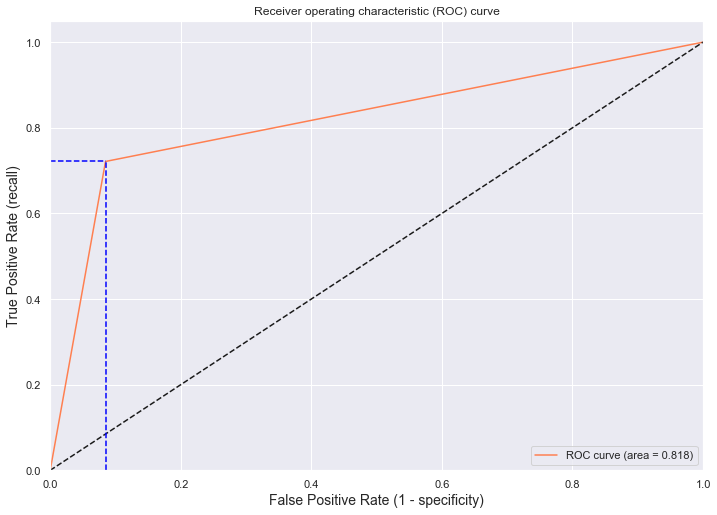

In [93]:
[fpr, tpr, thr] = roc_curve(y_test.to_numpy(), y_pred_opt)

idx = np.argmin((1-tpr)**2+fpr**2 )

plt.figure(figsize=a4_dims);
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr));
plt.plot([0, 1], [0, 1], 'k--');
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue');
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14);
plt.ylabel('True Positive Rate (recall)', fontsize=14);
plt.title('Receiver operating characteristic (ROC) curve');
plt.legend(loc="lower right");
plt.show();


### Hyperparameter tuning

> Add regularisation to the loss & find optimal C

\begin{equation}
    J(\theta) = -\frac{1}{m}.\left\{ \sum_{i=0}^m \left\{ y_i.log(h_{\theta}(x^{(i)})) + (1 - y_i).log(h_{\theta}(x^{(i)}))] \right\}+ \lambda.\sum_{i=1}^m \theta_j^2\right\}\\
    \lambda = \frac{1}{C} : \text{regularisation parameter}
   \end{equation} 

In [94]:
from sklearn.model_selection import GridSearchCV



param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X[opt_columns], y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000e...
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00,
       2.00001e+00, 2.10001e+00, 2.20001e+00, 2.30001e+00, 2.40001e+00,
       2.50001e+00, 2.60001e+00, 2.70001e+00, 2.80001e+00, 2.90001e+00])},
  

best params: LogisticRegression(C=0.60001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.60001}
best score: 0.8271604938271605


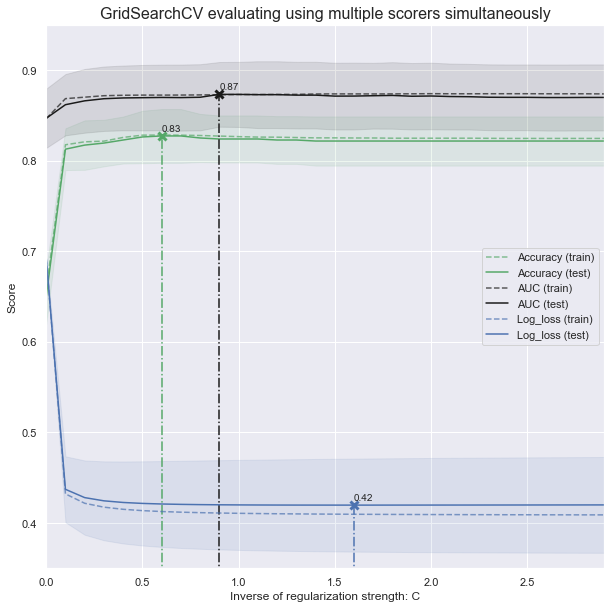

In [95]:
plt.figure(figsize=(10, 10));
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16);

plt.xlabel("Inverse of regularization strength: C");
plt.ylabel("Score");
plt.grid();

ax = plt.axes();
ax.set_xlim(0, param_grid['C'].max()) ;
ax.set_ylim(0.35, 0.95);

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color);
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample));

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8);

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005));

plt.legend(loc="best");
plt.grid('off');
plt.show();

### Re-fit on full dataset

In [99]:
logreg_final = LogisticRegression(C=2.9)
logreg_final.fit(X[opt_columns], y)

LogisticRegression(C=2.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
X_final = my_data_oneHot[1][opt_columns]


In [102]:
final_test = my_data_oneHot[1].copy()

final_test['Survived'] = log_clf.predict(X_final)
#final_test['PassengerId'] = X_final['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


Final score on Kaggle test set is accuracy=0.7799

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Take away message </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Basics

> 1 - Do some feature selection/have some insight on data  - important if you want to use "classical" ML algorithms ! (Better for small datasets). Define:
 ```python 
X = your features
y = your labels```

> 2 -  Split into train/test set:
```python 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)```

> 3 - Train your model
```python 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)```

> 4 - Evaluate
```python 
logreg.score(X_test[c], y_test)```
 gives accuracy. For other metrics:
```python 
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = logreg.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
```

### Optimisation, model selection

> * Feature engineering is crucial! 

> * Other metrics: check out sklearn's classification_report, confusion_matrix, roc_curve

> * Cross-validation: check out GridSearchCV for hyperparameter tuning

> * Pipelines (not covered here)
